# Project by : Mohammed Saqlain Attar

## Maple Leaves Ltd is a start-up company which makes herbs from different types of plants and its leaves. Currently the system they use to classify the trees which they import in a batch is quite manual. A labourer from his experience decides the leaf type and subtype of plant family. They have asked us to automate this process and remove any manual intervention from this process.

## Objective: To classify the plant leaves by various classifiers from different metrics of the leaves and to choose the best classifier for future reference.

### Import the train and test csv.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv(r'C:\Users\saqla\Desktop\Python Certification for Data Science\Case Studies\Certification Project\Datasets\train.csv')
train_data.drop(columns='id',inplace=True)
train_data

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [3]:
train_data.dtypes.value_counts()

float64    192
object       1
dtype: int64

In [4]:
train_data['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [5]:
train_data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [6]:
test_data = pd.read_csv(r'C:\Users\saqla\Desktop\Python Certification for Data Science\Case Studies\Certification Project\Datasets\test.csv')
test_data.drop(columns='id',inplace=True)
test_data

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


### The test set we imported is for testing the best classifier accuracy once we choose it and predict the outcome(y)

### The training and testing datasets have too many features (192) which can reduce the efficiency of the model and can be computationally intensive. 

### Performing Dimensionality Reduction using PCA to reduce the number of features

### PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=0.95)

In [9]:
pca.fit(train_data.loc[:,'margin1':'texture64'])

PCA(n_components=0.95)

In [10]:
pca.explained_variance_ratio_.sum()

0.950484763781747

In [11]:
pca.explained_variance_ratio_.shape

(48,)

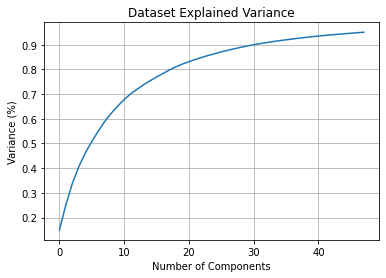

In [12]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid(True)
plt.show()

In [13]:
train_data_pca = pca.transform(train_data.loc[:,'margin1':'texture64'])

train_data_pca = pd.DataFrame(train_data_pca, columns=list(range(1,49)))
train_data_pca

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,-0.034391,-0.044043,-0.078234,0.015091,0.014542,0.026259,0.012217,0.043066,0.026620,-0.024099,...,-0.008043,0.013997,0.008862,-0.000627,-0.002509,0.006751,0.006718,-0.011827,-0.008480,-0.004202
1,-0.098290,-0.076697,-0.016510,-0.018842,-0.009512,0.006152,0.028564,0.048211,-0.062750,0.012860,...,-0.006775,0.004391,0.004848,0.010784,-0.010729,-0.007652,-0.004820,0.006672,-0.008280,0.011991
2,0.087150,-0.084009,0.072021,-0.018492,0.038819,0.024141,-0.074831,0.049646,-0.048841,-0.030141,...,0.013676,-0.014574,0.001046,0.036749,-0.027502,0.003845,-0.002590,0.013054,-0.010842,-0.006109
3,-0.095144,-0.087834,-0.069639,-0.005416,0.067378,0.055953,0.079994,0.033601,-0.060079,0.005913,...,0.015841,0.010626,0.020875,-0.009175,0.007040,0.007169,0.000491,0.004213,-0.010877,0.020321
4,0.087992,-0.079204,0.014859,0.016285,0.086109,-0.009683,-0.083320,-0.013338,0.014871,0.040679,...,0.006616,0.028766,0.036433,0.011899,0.025749,-0.011416,0.020777,-0.012608,0.001260,-0.005711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.286150,0.082295,0.096107,-0.131990,0.023139,0.078332,0.031647,0.023917,0.023674,-0.015596,...,-0.001510,0.006015,0.004472,0.009104,-0.001577,0.006388,-0.025697,0.003134,-0.008799,0.007459
986,0.122388,-0.042799,0.014139,-0.010764,0.055061,-0.076911,0.033055,-0.147826,-0.068589,-0.027912,...,-0.018244,-0.002063,0.011019,-0.002852,-0.006562,0.003416,0.011926,0.017449,0.023106,0.005350
987,-0.117738,-0.055298,0.051162,-0.018249,-0.028137,0.034693,-0.003978,0.019977,-0.006105,0.043956,...,-0.005352,-0.000831,0.016348,0.030620,0.022953,-0.013710,-0.032326,-0.007842,0.013277,-0.029374
988,0.050874,-0.050419,0.068655,0.014190,-0.008632,-0.110476,-0.009652,-0.126982,-0.028765,0.029653,...,-0.024234,0.067522,-0.016454,-0.010490,-0.027410,0.009564,0.007761,-0.002552,0.005320,0.015437


In [14]:
test_data_pca = pca.transform(test_data)

test_data_pca = pd.DataFrame(test_data_pca, columns=list(range(1,49)))
test_data_pca

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,0.021044,-0.054868,-0.061230,0.064414,0.027876,-0.014487,-0.040864,0.013268,0.076789,-0.018849,...,-0.030482,-0.013605,0.009563,0.013663,-0.016052,-0.000198,0.007232,-0.009374,-0.021746,-0.018155
1,-0.015603,-0.059713,-0.080873,0.038424,0.024277,-0.015137,0.030461,0.014668,0.032825,-0.035397,...,0.005544,0.004417,0.008522,0.001394,0.015021,0.013289,-0.001073,0.008138,-0.001115,-0.000035
2,0.080842,-0.100251,0.153631,-0.108881,0.047776,0.079469,0.048490,0.047053,0.059067,-0.013172,...,0.001748,0.006341,0.024486,-0.018578,0.008416,0.005043,-0.006598,0.005722,-0.009595,-0.014382
3,-0.110092,-0.044904,0.058503,0.041833,-0.001881,0.089592,-0.005866,-0.042263,0.019524,0.060561,...,0.000189,0.010670,-0.023762,-0.013028,-0.021676,0.031149,0.016211,-0.004676,-0.007746,-0.015949
4,-0.102819,-0.080947,0.085035,0.050096,-0.046580,0.041529,0.003432,-0.003534,-0.020148,0.069077,...,-0.026911,-0.013378,0.006634,-0.032686,0.052864,-0.034231,-0.008817,0.014091,0.004466,0.008469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.078640,-0.101247,0.175653,-0.104017,0.031640,0.074892,0.049596,0.058574,0.056304,-0.014521,...,0.001090,0.009856,0.029415,-0.026742,0.010220,0.006222,-0.013798,-0.003929,-0.013325,-0.013868
590,-0.075702,-0.068323,0.038435,0.051688,0.006298,0.092816,-0.034888,-0.009691,0.024144,0.030676,...,-0.010375,0.017079,-0.021656,-0.000185,-0.003827,-0.022200,-0.006950,0.001473,0.010433,-0.003473
591,0.085883,-0.051642,0.030496,0.011309,-0.005031,-0.025456,-0.076438,0.055357,-0.037954,0.006987,...,0.007319,-0.010602,-0.019253,0.027624,0.024318,-0.014221,-0.005499,-0.005439,-0.033008,-0.005551
592,-0.104498,-0.014828,-0.113173,-0.137729,0.036143,-0.057464,0.094383,0.022292,-0.029001,0.072111,...,0.007119,0.009465,-0.010563,0.014502,0.003275,0.003547,-0.002066,-0.002869,-0.006050,0.006454


### Encoding the labels of the target given in the dataset using label encoder. 

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
labelencoder = LabelEncoder()

In [17]:
y = labelencoder.fit_transform(train_data['species'])
y

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [18]:
X = train_data_pca

In [19]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,-0.034391,-0.044043,-0.078234,0.015091,0.014542,0.026259,0.012217,0.043066,0.026620,-0.024099,...,-0.008043,0.013997,0.008862,-0.000627,-0.002509,0.006751,0.006718,-0.011827,-0.008480,-0.004202
1,-0.098290,-0.076697,-0.016510,-0.018842,-0.009512,0.006152,0.028564,0.048211,-0.062750,0.012860,...,-0.006775,0.004391,0.004848,0.010784,-0.010729,-0.007652,-0.004820,0.006672,-0.008280,0.011991
2,0.087150,-0.084009,0.072021,-0.018492,0.038819,0.024141,-0.074831,0.049646,-0.048841,-0.030141,...,0.013676,-0.014574,0.001046,0.036749,-0.027502,0.003845,-0.002590,0.013054,-0.010842,-0.006109
3,-0.095144,-0.087834,-0.069639,-0.005416,0.067378,0.055953,0.079994,0.033601,-0.060079,0.005913,...,0.015841,0.010626,0.020875,-0.009175,0.007040,0.007169,0.000491,0.004213,-0.010877,0.020321
4,0.087992,-0.079204,0.014859,0.016285,0.086109,-0.009683,-0.083320,-0.013338,0.014871,0.040679,...,0.006616,0.028766,0.036433,0.011899,0.025749,-0.011416,0.020777,-0.012608,0.001260,-0.005711


### Importing the required classification algorithms from sklearn (Randomforest, SVM, NaiveBayes, DecisionTrees)

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Splitting the training data into 80:20 ratio

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

### We currently don’t know which is the best classifier on the dataset. So, we try all 4 classifiers.

In [23]:
model_params = {
    'Naive Bayes':{'model':GaussianNB(),'param':{}},
    'Decision_tree':{'model':DecisionTreeClassifier(),'param':{}},
    'Random_forest':{'model':RandomForestClassifier(),'param':{}},
    'SVM':{'model':svm.SVC(),'param':{}}
}

In [24]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_
    })
    
result_df = pd.DataFrame(scores,columns=['model','best_score'])
result_df

,model,best_score
0,Naive Bayes,0.826988
1,Decision_tree,0.491060
2,Random_forest,0.885089
3,SVM,0.858578


Text(0.5, 0, 'best_score (%)')

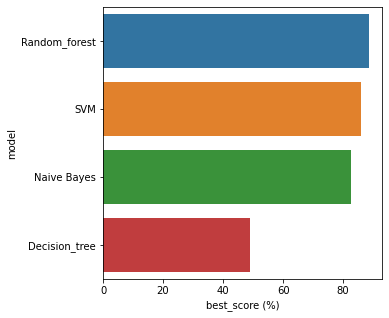

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.barplot(x=result_df['best_score']*100,y=result_df['model'],data=result_df,order=['Random_forest','SVM','Naive Bayes','Decision_tree'])
plt.xlabel('best_score (%)')

### We can see that Random Forest Classifier has the best accuracy among all other Classifiers

### Now we will perform Hyperparameter tuning to find the best parameters for Random Forest Classifier

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
param_distributions = {'n_estimators':[50,100,150,200,250,300],'criterion':['gini','entropy'],'max_depth':list(range(1,15)),
                       'max_features':('auto','log2')}

clf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_distributions, cv=10, 
                         n_iter=10, n_jobs=-1)
clf.fit(X,y)

print(clf)

print('Best Score:',clf.best_score_)
print('Best Estimator:',clf.best_estimator_)
print('Best Parameters:',clf.best_params_)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'max_features': ('auto', 'log2'),
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]})
Best Score: 0.9141414141414141
Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=250)
Best Parameters: {'n_estimators': 250, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'entropy'}


### Predicting the result on the import test.csv dataset

### Using the Random Forest Classifier with best parameters found in RandomizedSearchCV to predict the test_data

In [28]:
predicted = clf.predict(test_data_pca)
predicted

array([51, 50,  1, 19, 14, 86,  3, 28, 84,  8, 43, 74, 75, 10, 52, 18, 45,
       73, 13, 71, 61, 68, 57, 77,  1, 70, 28, 15, 35, 70, 53, 74, 47, 50,
        4, 36, 14, 55, 36, 93,  8, 32,  8,  9, 71, 70, 38, 23, 94, 18,  7,
        5, 55, 94, 14, 86, 62, 33, 51, 98, 88, 56, 21, 59, 65, 11, 48,  5,
       13,  4, 54, 57, 29, 57, 31, 98, 92, 84, 25, 10, 61, 58, 85, 24,  1,
        2, 23, 83, 40, 22, 48, 90, 25, 21, 39, 56, 41, 95,  7, 49, 98, 77,
        3, 12, 31, 84, 53, 96, 64, 72, 93, 93, 67, 30,  8, 88, 60, 87,  6,
       57, 34, 34, 60, 17, 86, 27, 51,  7, 39, 23, 96,  2, 41, 61, 24, 97,
       29, 28, 68, 81, 42, 51, 86, 62, 60, 52, 95, 64, 42, 96, 95, 20, 59,
       35, 86,  1, 56, 38, 43, 75, 20, 60, 46, 79, 22, 79, 69, 87, 65, 97,
       75, 21, 37, 21, 11, 10, 58, 94, 27, 22, 15, 45, 89, 54, 43,  5, 23,
       94, 40, 49, 89, 72, 36, 11, 90, 95, 18, 91, 29, 64, 80,  6, 78, 45,
       28,  9, 78, 90, 44, 89, 92, 13, 31, 59,  0, 96, 70, 32, 29, 78, 91,
       69, 44, 38,  5, 60

### Adding Predicted Species Column to test_data

In [29]:
test_data['Predicted Species'] = labelencoder.inverse_transform(predicted)
test_data

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,Predicted Species
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711,Quercus_Agrifolia
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922,Quercus_Afares
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000,Acer_Circinatum
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789,Castanea_Sativa
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812,Alnus_Viridis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977,Acer_Circinatum
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602,Alnus_Rubra
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836,Quercus_Canariensis
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555,Quercus_Phillyraeoides


### Saving the model using pickle

In [30]:
import pickle

In [31]:
pickle.dump(clf,open(r'C:\Users\saqla\Desktop\Python Certification for Data Science\Case Studies\Certification Project\Project 3\Certification Project 3 - PHARMA- Copy (v2)\finalized_model.sav','wb'))